# Predicting Heart Stroke

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
train_data = pd.read_csv('train_2v.csv')
test_data = pd.read_csv('test_2v.csv')

In [109]:
train_data = train_data.drop(['id'],1)
test_data = test_data.drop(['id'],1)

In [110]:
train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [120]:
train_data['stroke'][train_data['stroke']==1].count()

783

In [6]:
test_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


# Data Preprocessing

In [7]:
train_data[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


In [8]:
train_data.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
test_data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [121]:
train_data = train_data.dropna(axis=0)
train_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [122]:
train_data['stroke'][train_data['stroke']==1].count()

548

In [11]:
test_data = test_data.dropna(axis=0)

In [12]:
test_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [13]:
train_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000
mean,47.671746,0.111482,0.052146,106.403225,30.054166,0.018850
std,18.734490,0.314733,0.222326,45.268512,7.193908,0.135997
min,10.000000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,32.000000,0.000000,0.000000,77.627500,25.000000,0.000000
50%,48.000000,0.000000,0.000000,92.130000,28.900000,0.000000
75%,62.000000,0.000000,0.000000,113.910000,33.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,92.000000,1.000000


# Exploratory Data Analysis(EDTA)

Text(0.5, 1.0, 'DATA SET IS IMBALANCED')

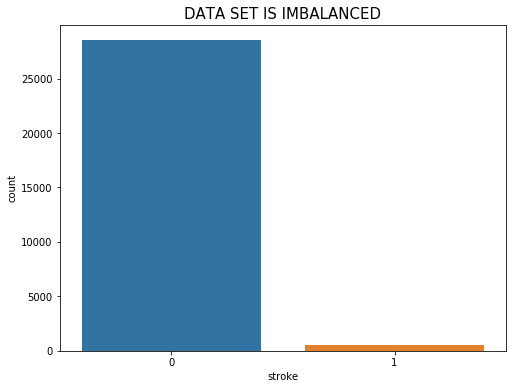

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(train_data['stroke'])
plt.title('DATA SET IS IMBALANCED',fontsize = 15)

Text(0.5, 1.0, 'SMOKING STATUS VS STROKE')

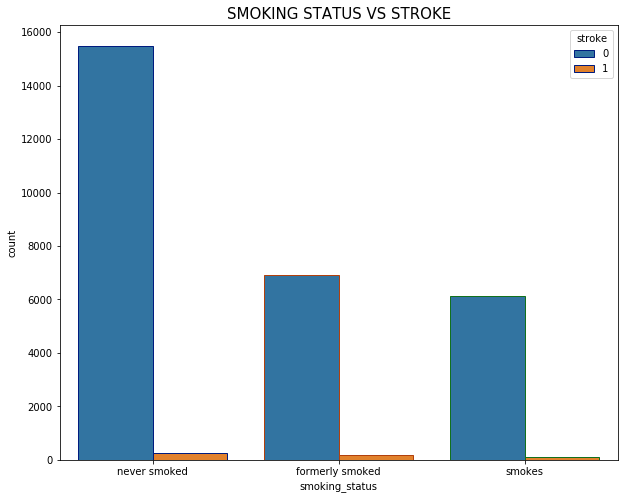

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(train_data['smoking_status'],hue = train_data['stroke'],edgecolor=sns.color_palette("dark", 3))
plt.title('SMOKING STATUS VS STROKE',fontsize = 15)

Text(0.5, 1.0, 'GENDER VS STROKE')

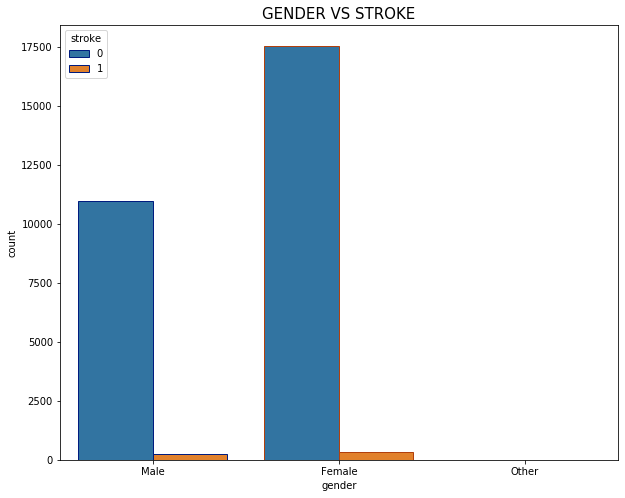

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(train_data['gender'],hue = train_data['stroke'],edgecolor=sns.color_palette("dark", 3))
plt.title('GENDER VS STROKE',fontsize = 15)

# Converting Categorical Features into Numerical Values

In [38]:
from sklearn.preprocessing import LabelEncoder
lblEnc = LabelEncoder()
train_data = train_data.apply(lblEnc.fit_transform)
test_data  = test_data.apply(lblEnc.fit_transform)

In [37]:
train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,48,1,0,1,2,1,3169,261,1,0
3,0,60,0,0,1,2,0,1297,228,0,0
6,0,42,0,0,1,2,1,2137,46,0,0
7,0,65,0,1,1,3,0,10819,139,1,0
8,0,22,0,0,1,2,0,2145,192,2,0


In [39]:
test_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,70,0,0,1,2,1,2213,63,0
1,0,64,0,1,1,3,0,5990,112,0
4,0,53,0,0,1,0,0,2186,128,1
5,0,56,1,0,1,2,1,6787,174,1
7,1,36,0,0,1,0,1,4896,177,1


In [51]:
X = train_data.drop(['stroke'],1)
y = train_data['stroke']

# Splitting Trainning Data into Training Set and Test Set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Applying Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [56]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
y_pred_dtc = dtc.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Accuracy obtained by Decisiontree Classifier 95.97%

In [67]:
print(confusion_matrix(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))
print(accuracy_score(y_test,y_pred_dtc))

[[9200  232]
 [ 155    7]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9432
           1       0.03      0.04      0.03       162

    accuracy                           0.96      9594
   macro avg       0.51      0.51      0.51      9594
weighted avg       0.97      0.96      0.96      9594

0.9596622889305816


# Applying Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [85]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_pred_rfc = rfc.predict(X_test)

# Accuracy Obatained 98.30% by Using RandomForest

In [87]:
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(accuracy_score(y_test,y_pred_rfc))

[[9431    1]
 [ 162    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9432
           1       0.00      0.00      0.00       162

    accuracy                           0.98      9594
   macro avg       0.49      0.50      0.50      9594
weighted avg       0.97      0.98      0.97      9594

0.9830102147175318


# Applying Naivebayes Algorithm

In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [89]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
y_pred_gnb = gnb.predict(X_test)

# Accuracy Obatained 93.25% by Using NaiveBayes

In [123]:
print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
print(accuracy_score(y_test,y_pred_gnb))

[[8904  528]
 [ 119   43]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      9432
           1       0.08      0.27      0.12       162

    accuracy                           0.93      9594
   macro avg       0.53      0.60      0.54      9594
weighted avg       0.97      0.93      0.95      9594

0.9325620179278716


# Crossvalidating The Accuracies

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,X,y,cv = 20, scoring='accuracy').mean()

0.9810127460048035

In [93]:
cross_val_score(dtc,X,y,cv = 20, scoring='accuracy').mean()

0.9592052822458111

In [94]:
cross_val_score(gnb,X,y,cv = 20, scoring='accuracy').mean()

0.9304149930277534

# Final Accuracies

Random Forest = 98.10%

Decision Tree = 95.92%

NaiveBayes = 93.04%

Apparently, Random Forest Provides bes accuracy, However We're concerned about reducing False Negative Predictions. i.e. Person Might have heart stroke but predicted as non heart stroke which is dangerous.
Hence one may choose both Random Forest and Decision Tree Model.